In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot

In [2]:
df = pd.read_csv("data/Features_For_Traditional_ML_Techniques.csv")
df

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,...,0,2,1,0,3,0,31,0,4,32
134194,134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,...,0,0,1,0,0,0,16,6,2,8
134195,134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,...,1,4,1,0,0,1,2,4,0,37
134196,134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,...,1,0,3,0,0,0,0,0,1,11


In [3]:
df.shape

(134198, 64)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Unnamed: 0         0
majority_target    0
statement          0
BinaryNumTarget    0
tweet              0
                  ..
ampersand          0
capitals           0
digits             0
long_word_freq     0
short_word_freq    0
Length: 64, dtype: int64

In [6]:
len(df['statement'].unique())

1058

In [7]:
pd.options.display.float_format = '{:.1f}'.format

print(df.describe())

       Unnamed: 0  BinaryNumTarget  followers_count  friends_count  \
count    134198.0         134198.0         134198.0       134198.0   
mean      67098.5              0.5          11293.1         1893.5   
std       38739.8              0.5         437497.1         6997.7   
min           0.0              0.0              0.0            0.0   
25%       33549.2              0.0             70.0          168.0   
50%       67098.5              1.0            354.0          567.0   
75%      100647.8              1.0           1573.0         1726.0   
max      134197.0              1.0      130601913.0       586901.0   

       favourites_count  statuses_count  listed_count  following  BotScore  \
count          134198.0        134198.0      134198.0   134198.0  134198.0   
mean            32981.2         34195.8          73.3        0.0       0.1   
std             68780.2         75101.2        1083.3        0.0       0.2   
min                 0.0             1.0           0.0    

In [8]:
df.describe()

,Unnamed: 0,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
count,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,...,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0
mean,67098.5,0.5,11293.1,1893.5,32981.2,34195.8,73.3,0.0,0.1,0.0,...,0.1,1.0,2.4,0.3,0.3,0.1,12.8,3.6,2.2,21.4
std,38739.8,0.5,437497.1,6997.7,68780.2,75101.2,1083.3,0.0,0.2,0.2,...,0.4,1.1,2.1,0.9,0.8,0.5,15.6,6.7,2.9,9.6
min,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,33549.2,0.0,70.0,168.0,1356.0,3046.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,1.0,14.0
50%,67098.5,1.0,354.0,567.0,8377.0,11019.0,2.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,10.0,2.0,2.0,21.0
75%,100647.8,1.0,1573.0,1726.0,33526.5,33573.8,11.0,0.0,0.0,0.0,...,0.0,2.0,3.0,0.0,0.0,0.0,15.0,4.0,3.0,28.0
max,134197.0,1.0,130601913.0,586901.0,1765080.0,2958918.0,222193.0,0.0,1.0,1.0,...,5.0,13.0,50.0,66.0,43.0,13.0,250.0,138.0,47.0,164.0


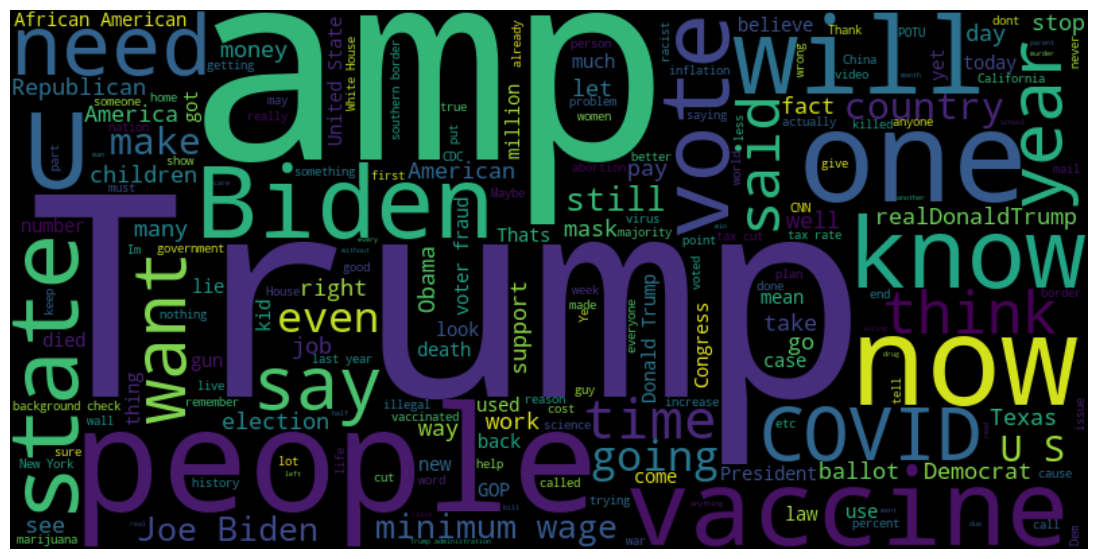

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['tweet'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


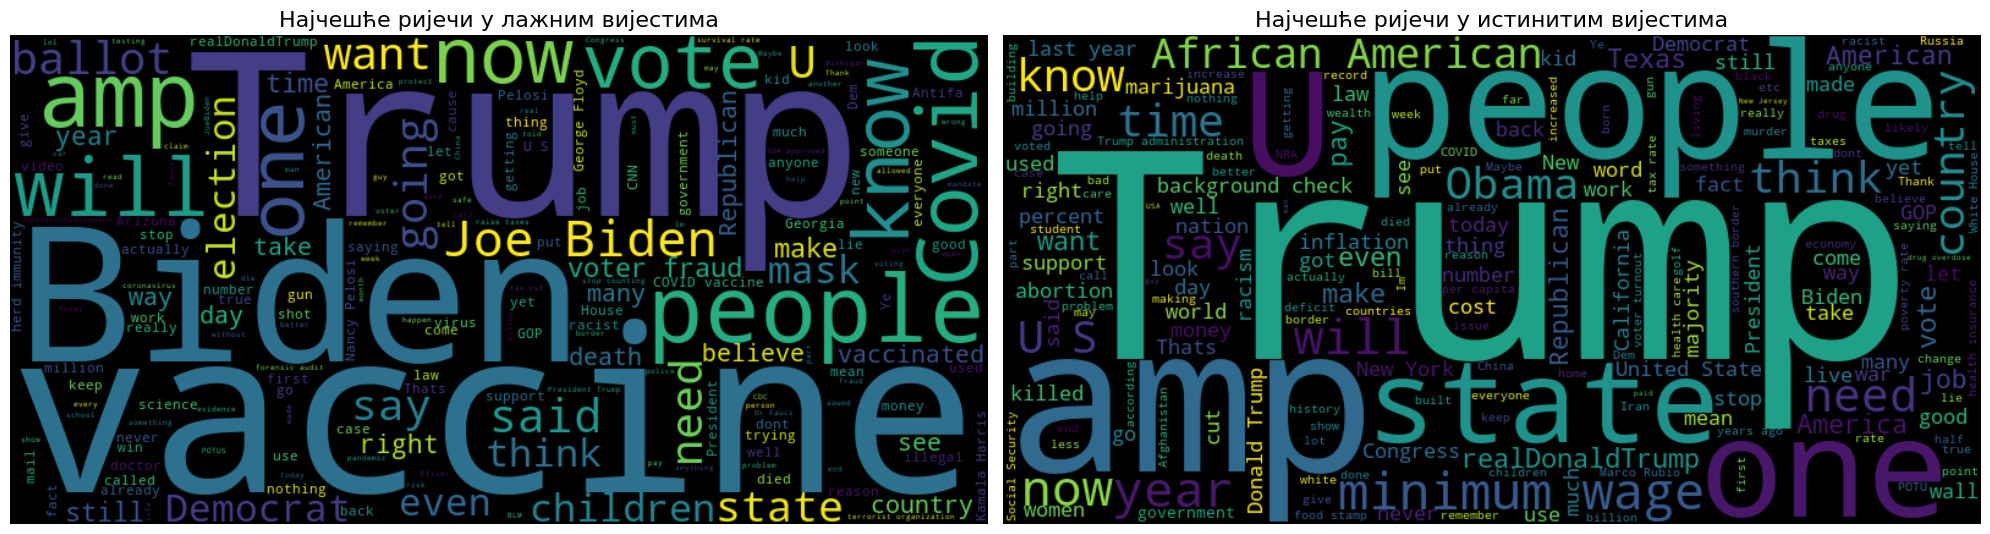

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud za lažne vijesti
df_false = df[df['BinaryNumTarget'] == 0.0]
text_false = ' '.join(df_false['tweet'].astype(str).tolist())
wordcloud_false = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_false)

# WordCloud za istinite vijesti
df_true = df[df['BinaryNumTarget'] == 1.0]
text_true = ' '.join(df_true['tweet'].astype(str).tolist())
wordcloud_true = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_true)

# Prikaz oba u istom redu
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Prikaz lažnih vijesti
axes[0].imshow(wordcloud_false, interpolation='bilinear')
axes[0].set_title('Најчешће ријечи у лажним вијестима', fontsize=16)
axes[0].axis('off')

# Prikaz istinitih vijesti
axes[1].imshow(wordcloud_true, interpolation='bilinear')
axes[1].set_title('Најчешће ријечи у истинитим вијестима', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [11]:
df[['majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs']].describe()

,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs
count,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0,134198.0
mean,0.5,11293.1,1893.5,32981.2,34195.8,73.3,0.0,0.1,0.0,0.4,0.1,1.4,0.6,1.9,6.7,27.6,0.1,0.7
std,0.5,437497.1,6997.7,68780.2,75101.2,1083.3,0.0,0.2,0.2,0.2,0.0,1.5,28.4,122.0,406.5,1831.4,0.5,0.4
min,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,70.0,168.0,1356.0,3046.0,0.0,0.0,0.0,0.0,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,354.0,567.0,8377.0,11019.0,2.0,0.0,0.0,0.0,0.4,0.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,1.0,1573.0,1726.0,33526.5,33573.8,11.0,0.0,0.0,0.0,0.5,0.1,2.0,0.0,1.0,0.0,1.0,0.0,1.0
max,1.0,130601913.0,586901.0,1765080.0,2958918.0,222193.0,0.0,1.0,1.0,1.0,0.2,12.0,5913.0,42068.0,126062.0,460320.0,12.0,1.0


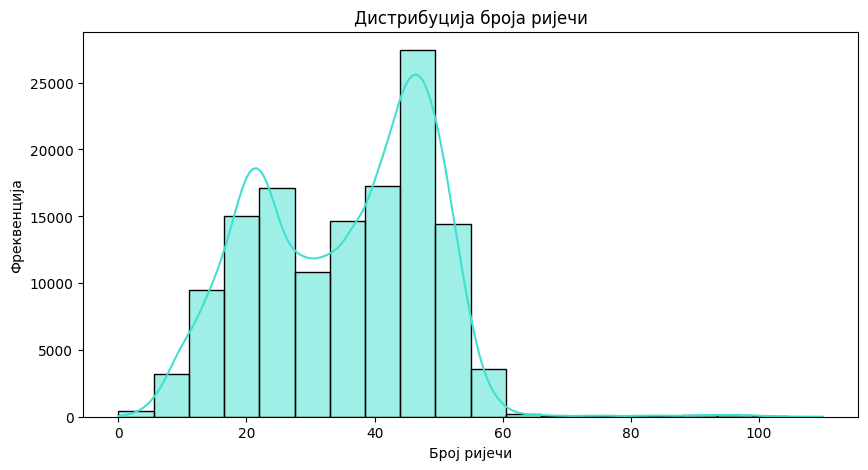

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Word count'], bins=20, kde=True, color='turquoise')

plt.xlabel("Број ријечи")
plt.ylabel("Фреквенција")
plt.title("Дистрибуција броја ријечи")


plt.show()

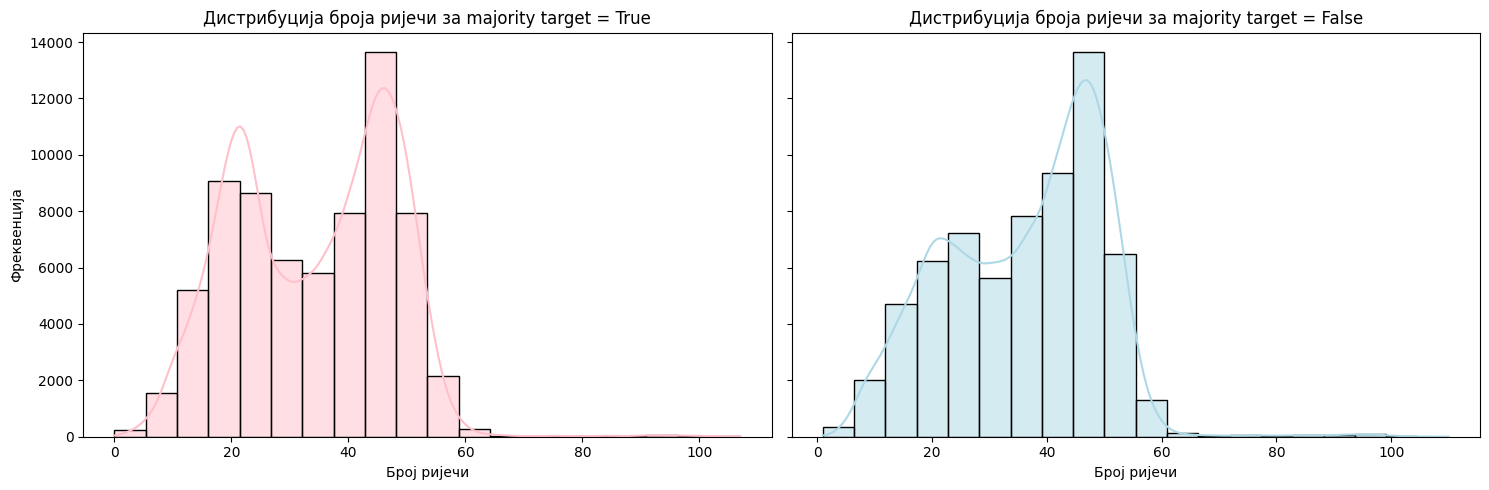

In [13]:

df_true = df[df['majority_target'] == True]
df_false = df[df['majority_target'] == False]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) 


sns.histplot(df_true['Word count'], bins=20, kde=True, color='pink', ax=axes[0])
axes[0].set_xlabel("Број ријечи")
axes[0].set_ylabel("Фреквенција")
axes[0].set_title("Дистрибуција броја ријечи за majority target = True")

sns.histplot(df_false['Word count'], bins=20, kde=True, color='lightblue', ax=axes[1])
axes[1].set_xlabel("Број ријечи")
axes[1].set_ylabel("Фреквенција")
axes[1].set_title("Дистрибуција броја ријечи за majority target = False")

plt.tight_layout()  
plt.show()


In [14]:
len(df[df['majority_target']==True])


68985

In [15]:
len(df[df['majority_target']==False])

65213

In [16]:
df.columns

Index(['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count',
       'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
       'adverbs', 'adpositions', 'pronouns', 'TOs', 'deter

In [17]:
len(df[df['BotScoreBinary']==0.0])

129856

In [18]:
len(df[df['BotScoreBinary']==1.0])

4342

In [19]:
korisnicke_kolone = ['followers_count', 'favourites_count','friends_count',
       'statuses_count', 'listed_count']


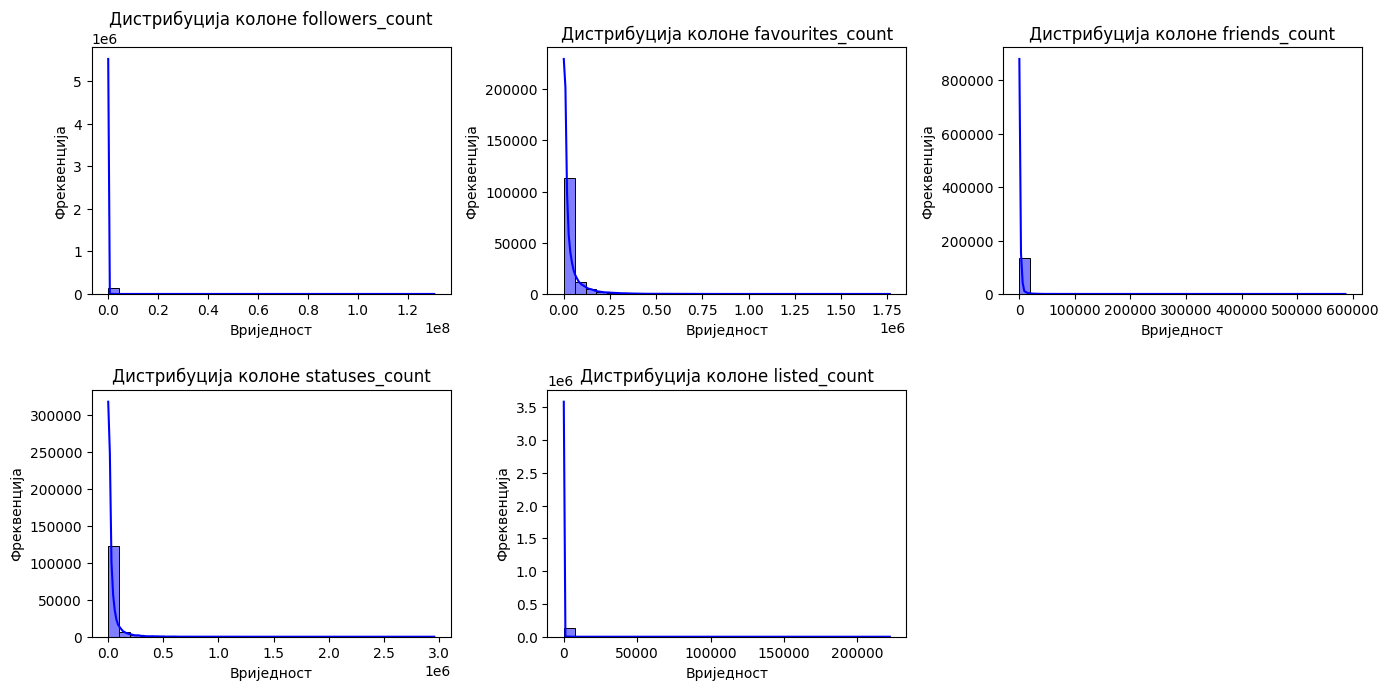

In [20]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(korisnicke_kolone, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Дистрибуција колоне {col}')
    plt.xlabel('Вриједност')
    plt.ylabel('Фреквенција')
 
plt.tight_layout()
plt.show()

In [21]:
zalogskal = ['followers_count', 'favourites_count','friends_count',
       'statuses_count', 'listed_count']

In [22]:
for col in zalogskal:
    df[f'log_{col}'] = np.log1p(df[col])

In [23]:
korisnicke_kolone_poslije_logskal =  ['log_followers_count', 'log_favourites_count','log_friends_count',
       'log_statuses_count', 'log_listed_count']

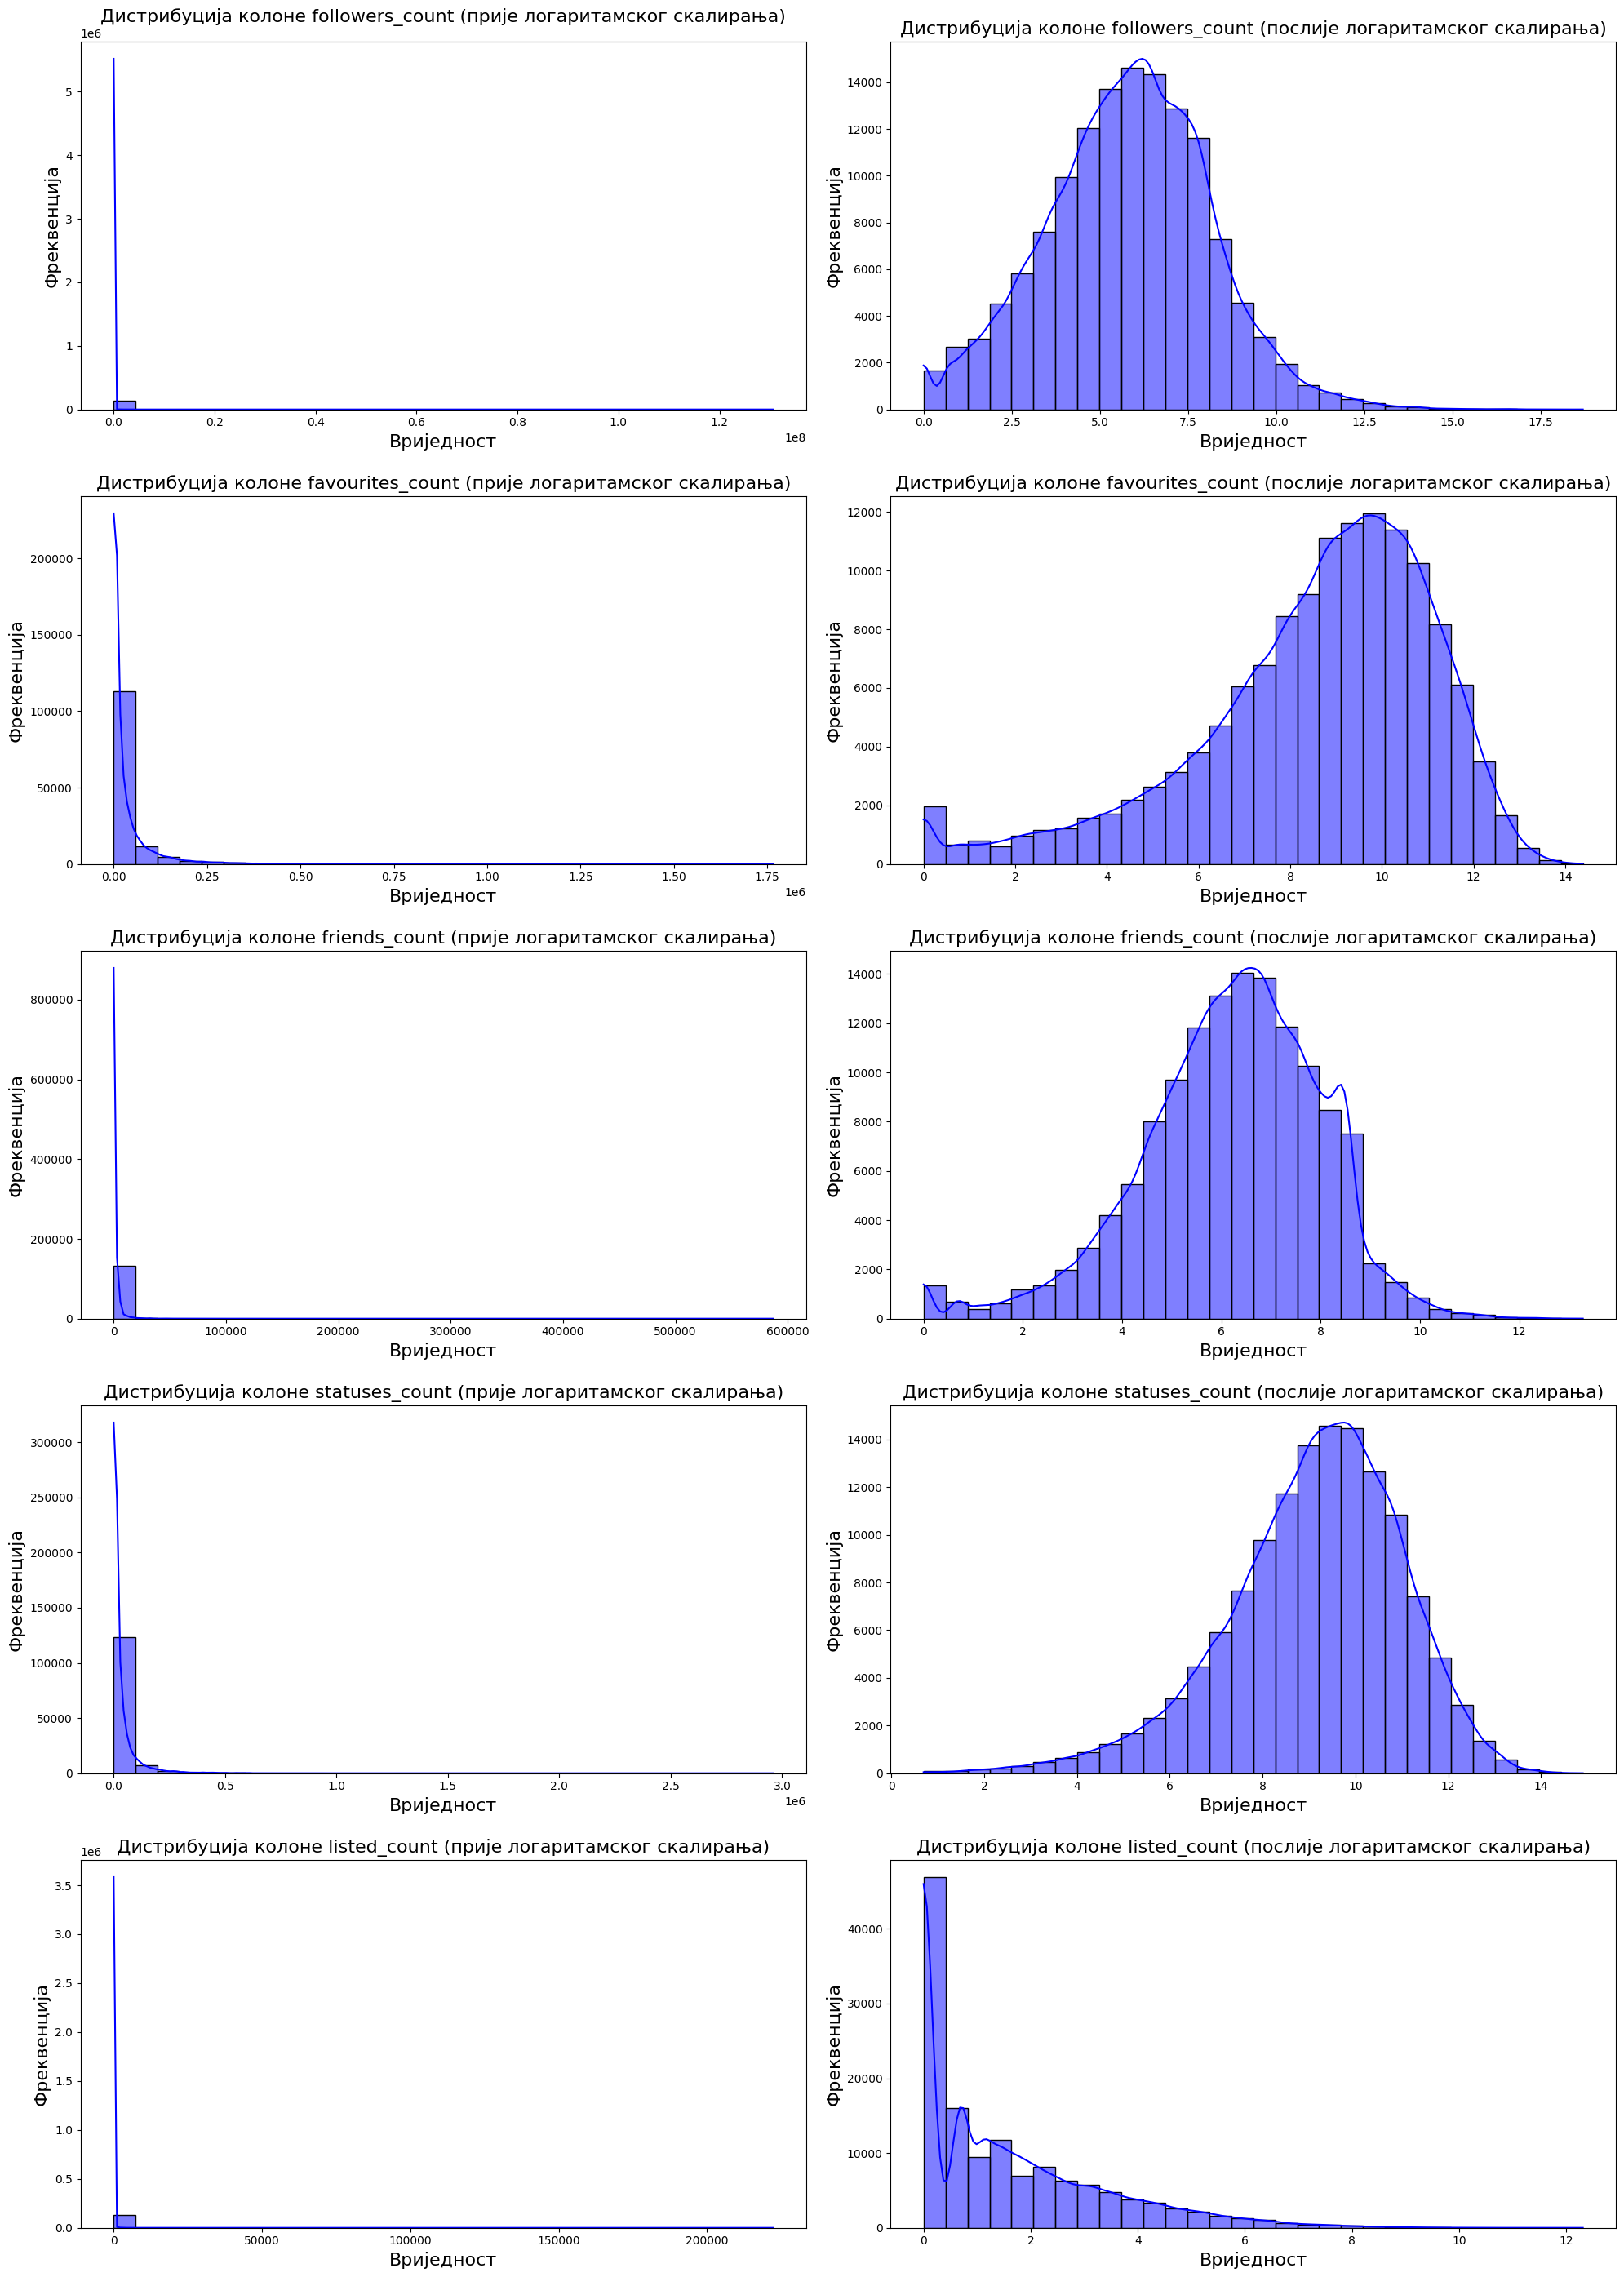

In [37]:

plt.figure(figsize=(20, 28))

for i, (col, col_log) in enumerate(zip(korisnicke_kolone, korisnicke_kolone_poslije_logskal), 1):
    plt.subplot(5, 2, 2*i - 1)  # Lijevi panel (pre log skaliranja)
    sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Дистрибуција колоне {col} (прије логаритамског скалирања)', fontsize=16)
    plt.xlabel('Вриједност', fontsize=16)
    plt.ylabel('Фреквенција', fontsize=16)
    
    plt.subplot(5, 2, 2*i)  # Desni panel (posle log skaliranja)
    sns.histplot(df[col_log], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Дистрибуција колоне {col} (послије логаритамског скалирања)', fontsize=16)
    plt.xlabel('Вриједност', fontsize=16)
    plt.ylabel('Фреквенција', fontsize=16)

plt.tight_layout()
plt.show()


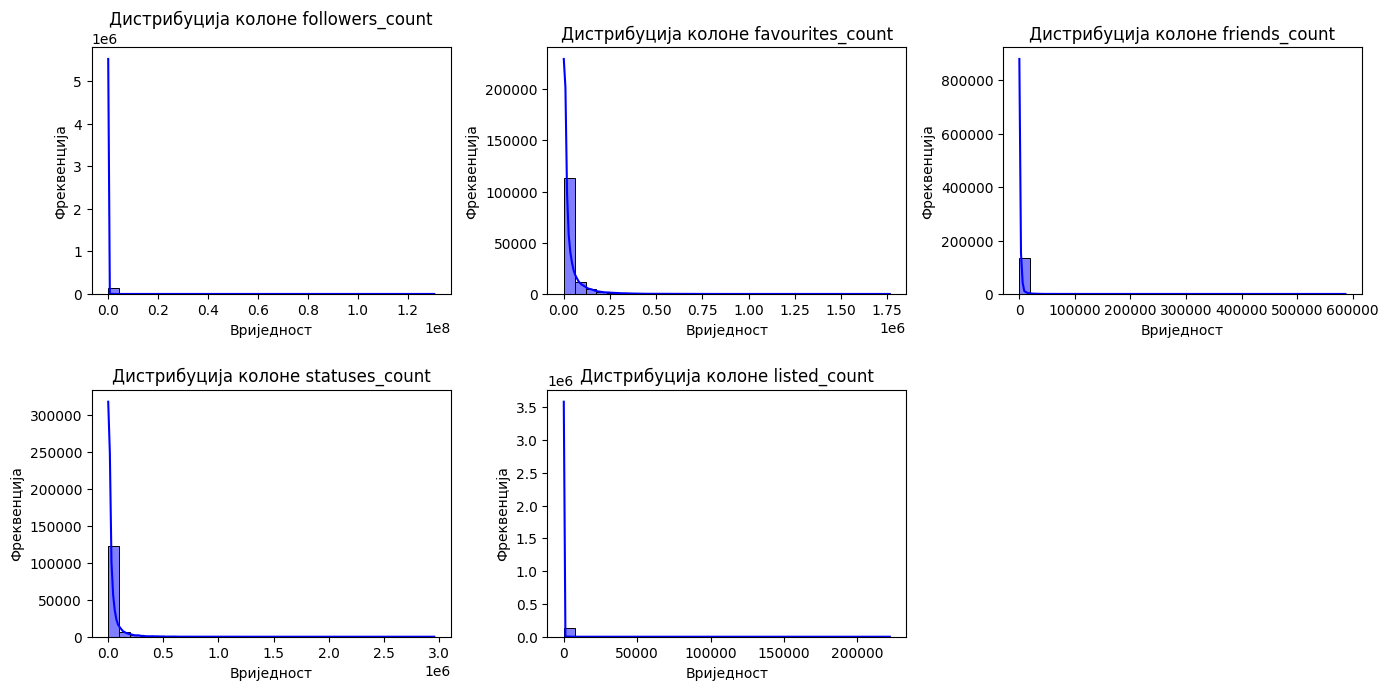

In [25]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(korisnicke_kolone, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Дистрибуција колоне {col}')
    plt.xlabel('Вриједност')
    plt.ylabel('Фреквенција')
 
plt.tight_layout()
plt.show()

In [38]:
df2 = pd.read_csv("final.csv")

In [39]:
df2.shape

(134195, 37)

In [41]:
for col in df2.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
majority_target
statement
BinaryNumTarget
tweet
followers_count
friends_count
favourites_count
statuses_count
listed_count
BotScore
BotScoreBinary
cred
normalize_influence
mentions
quotes
replies
retweets
favourites
hashtags
URLs
tweet_new
tweet_tokens
Word count
Max word length
Min word length
Average word length
Present verbs
Past verbs
Adjectives
Adverbs
Pronouns
Conjunctions
Determiners
Prepositions
Digits
